# 🌲🌲 Random Forest 🌲🌲

Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. As the name suggests, it is a “forest” of trees!

It is a forest of randomly created decision trees. Each node in the decision tree works on a random subset of features to calculate the output. The random forest then combines the output of individual decision trees to generate the final output.

## Picture speaks better than words 🤓

Below is the simple ilustration of how a Random forest works 

![title](rf.png)

## Import the requried libraries ⤵️

In [2]:
# to read the data and manipulate the data
import pandas as pd
import numpy as np
from datetime import datetime
from pandas_datareader import data as web

# for data visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
# from prettytable import PrettyTable

# for statistical analysis
import scipy.stats as ss
from scipy.optimize import minimize

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
start_date = datetime(2014,1,3)
end_date = datetime(2019,1,3)
visa = web.DataReader('V', 'yahoo', start_date ,end_date)
visa.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-03,55.622501,55.057499,55.437500,55.290001,7809600.0,52.275349
2014-01-06,55.577499,54.897499,55.294998,54.957500,8577600.0,51.960991
2014-01-07,55.527500,55.115002,55.187500,55.377499,8178000.0,52.358070
2014-01-08,55.750000,55.160000,55.355000,55.555000,8487200.0,52.525898
2014-01-09,56.130001,55.415001,55.887501,55.477501,8386400.0,52.452621


In [4]:
visa.reset_index(inplace=True)
visa.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-03,55.622501,55.057499,55.437500,55.290001,7809600.0,52.275349
1,2014-01-06,55.577499,54.897499,55.294998,54.957500,8577600.0,51.960991
2,2014-01-07,55.527500,55.115002,55.187500,55.377499,8178000.0,52.358070
3,2014-01-08,55.750000,55.160000,55.355000,55.555000,8487200.0,52.525898
4,2014-01-09,56.130001,55.415001,55.887501,55.477501,8386400.0,52.452621


In [5]:
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [7]:
# read the dataset using pandas 
df = pd.read_csv('FF3-df_final_(2).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,RF,Daily_Rtn
0,2014-01-03,55.437500,55.622501,55.057499,55.290001,52.275356,7809600,0.03,0.36,0.04,0.0,0.000679
1,2014-01-06,55.294998,55.577499,54.897499,54.957500,51.960960,8577600,-0.34,-0.57,0.30,0.0,-0.006014
2,2014-01-07,55.187500,55.527500,55.115002,55.377499,52.358082,8178000,0.68,0.39,-0.38,0.0,0.007643
3,2014-01-08,55.355000,55.750000,55.160000,55.555000,52.525898,8487200,0.04,0.00,-0.11,0.0,0.003205
4,2014-01-09,55.887501,56.130001,55.415001,55.477501,52.452633,8386400,0.02,0.20,-0.44,0.0,-0.001395


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
 7   Mkt-RF     1257 non-null   float64
 8   SMB        1257 non-null   float64
 9   HML        1257 non-null   float64
 10  RF         1257 non-null   float64
 11  Daily_Rtn  1257 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 118.0+ KB


### Date Column is of type *object*. We need to convert it to type *datetime64[ns]*. You'll later figure out why! 🤔

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1257 non-null   datetime64[ns]
 1   Open       1257 non-null   float64       
 2   High       1257 non-null   float64       
 3   Low        1257 non-null   float64       
 4   Close      1257 non-null   float64       
 5   Adj Close  1257 non-null   float64       
 6   Volume     1257 non-null   int64         
 7   Mkt-RF     1257 non-null   float64       
 8   SMB        1257 non-null   float64       
 9   HML        1257 non-null   float64       
 10  RF         1257 non-null   float64       
 11  Daily_Rtn  1257 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 118.0 KB


In [10]:
# Typical_Price is the mean value of High, Low and Close cols
df['Typical_Price'] = df[['High','Low','Close']].mean(axis=1)
df['Typical_Price_returns'] = (np.log(df.Typical_Price) - np.log(df.Typical_Price.shift(1))) * 100.
df['Volume_returns'] = (np.log(df.Volume) - np.log(df.Volume.shift(1))) * 100.
df

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,RF,Daily_Rtn,Typical_Price,Typical_Price_returns,Volume_returns
0,2014-01-03,55.437500,55.622501,55.057499,55.290001,52.275356,7809600,0.03,0.36,0.04,0.00,0.000679,55.323334,NaN,NaN
1,2014-01-06,55.294998,55.577499,54.897499,54.957500,51.960960,8577600,-0.34,-0.57,0.30,0.00,-0.006014,55.144166,-0.324381,9.380041
2,2014-01-07,55.187500,55.527500,55.115002,55.377499,52.358082,8178000,0.68,0.39,-0.38,0.00,0.007643,55.340000,0.354502,-4.770653
3,2014-01-08,55.355000,55.750000,55.160000,55.555000,52.525898,8487200,0.04,0.00,-0.11,0.00,0.003205,55.488333,0.267681,3.711152
4,2014-01-09,55.887501,56.130001,55.415001,55.477501,52.452633,8386400,0.02,0.20,-0.44,0.00,-0.001395,55.674168,0.334347,-1.194780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2018-12-24,122.080002,125.209999,121.599998,121.730003,119.285934,8617700,-2.55,1.00,-0.48,0.01,-0.020360,122.846667,-2.412727,-108.284250
1253,2018-12-26,123.019997,130.240005,123.000000,130.229996,127.615242,13499500,5.06,-0.06,-1.02,0.01,0.069826,127.823334,3.971214,44.883442
1254,2018-12-27,127.989998,132.009995,126.519997,132.009995,129.359482,10883000,0.78,-0.68,-0.14,0.01,0.013668,130.179995,1.826897,-21.545071
1255,2018-12-28,133.080002,133.619995,129.660004,130.940002,128.311005,7381300,-0.03,0.77,0.26,0.01,-0.008105,131.406667,0.937877,-38.825216


In [11]:
# read the ads_vintage file from the directory using pandas
ads_vintage = pd.read_excel("ads_vintages-zip.xlsx")
ads_vintage.head()

,Unnamed: 0,ADS_Index_010319,ADS_Index_010419,ADS_Index_011019,ADS_Index_011719,ADS_Index_011819,ADS_Index_012419,ADS_Index_013119,ADS_Index_020119,ADS_Index_020719,...,ADS_Index_091219,ADS_Index_091719,ADS_Index_091919,ADS_Index_092619,ADS_Index_092719,ADS_Index_100319,ADS_Index_100419,ADS_Index_101019,ADS_Index_101719,ADS_Index_102419
0,1960-03-01,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.824388,-1.824388,...,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069
1,1960-03-02,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.803702,-1.803702,...,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012
2,1960-03-03,-1.774851,-1.774851,-1.774851,-1.774851,-1.774851,-1.774851,-1.774851,-1.782618,-1.782618,...,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905
3,1960-03-04,-1.753491,-1.753491,-1.753491,-1.753491,-1.753491,-1.753491,-1.753491,-1.761132,-1.761132,...,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746
4,1960-03-05,-1.731743,-1.731743,-1.731743,-1.731743,-1.731743,-1.731743,-1.731743,-1.739243,-1.739243,...,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532


In [12]:
ads_vintage.rename(columns = {'Unnamed: 0':'Date'},inplace=True)
ads_vintage.head()

,Date,ADS_Index_010319,ADS_Index_010419,ADS_Index_011019,ADS_Index_011719,ADS_Index_011819,ADS_Index_012419,ADS_Index_013119,ADS_Index_020119,ADS_Index_020719,...,ADS_Index_091219,ADS_Index_091719,ADS_Index_091919,ADS_Index_092619,ADS_Index_092719,ADS_Index_100319,ADS_Index_100419,ADS_Index_101019,ADS_Index_101719,ADS_Index_102419
0,1960-03-01,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.824388,-1.824388,...,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069
1,1960-03-02,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.803702,-1.803702,...,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012
2,1960-03-03,-1.774851,-1.774851,-1.774851,-1.774851,-1.774851,-1.774851,-1.774851,-1.782618,-1.782618,...,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905
3,1960-03-04,-1.753491,-1.753491,-1.753491,-1.753491,-1.753491,-1.753491,-1.753491,-1.761132,-1.761132,...,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746
4,1960-03-05,-1.731743,-1.731743,-1.731743,-1.731743,-1.731743,-1.731743,-1.731743,-1.739243,-1.739243,...,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532


We need the Date and the ADS_Index_102419 columns of the data. 

In [13]:
ads_vintage_clean = ads_vintage.loc[:,['Date','ADS_Index_102419']]
ads_vintage_clean.head()

,Date,ADS_Index_102419
0,1960-03-01,-2.395069
1,1960-03-02,-2.369012
2,1960-03-03,-2.341905
3,1960-03-04,-2.313746
4,1960-03-05,-2.284532


In [14]:
ads_vintage_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21855 entries, 0 to 21854
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              21855 non-null  datetime64[ns]
 1   ADS_Index_102419  21782 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 341.6 KB


### Now we can merge the two datasets on Date column as they're now of same datatype.  💡

In [15]:
df = pd.merge(df, ads_vintage_clean, on='Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,RF,Daily_Rtn,Typical_Price,Typical_Price_returns,Volume_returns,ADS_Index_102419
0,2014-01-03,55.437500,55.622501,55.057499,55.290001,52.275356,7809600,0.03,0.36,0.04,0.0,0.000679,55.323334,NaN,NaN,-0.378983
1,2014-01-06,55.294998,55.577499,54.897499,54.957500,51.960960,8577600,-0.34,-0.57,0.30,0.0,-0.006014,55.144166,-0.324381,9.380041,-0.412198
2,2014-01-07,55.187500,55.527500,55.115002,55.377499,52.358082,8178000,0.68,0.39,-0.38,0.0,0.007643,55.340000,0.354502,-4.770653,-0.420924
3,2014-01-08,55.355000,55.750000,55.160000,55.555000,52.525898,8487200,0.04,0.00,-0.11,0.0,0.003205,55.488333,0.267681,3.711152,-0.428513
4,2014-01-09,55.887501,56.130001,55.415001,55.477501,52.452633,8386400,0.02,0.20,-0.44,0.0,-0.001395,55.674168,0.334347,-1.194780,-0.434965


# 1. Autoregressive Model

An autoregressive (AR) model predicts future behavior based on past behavior. It's used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them. 

In [16]:
class ar1:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

In [17]:
X_ar = df[['Typical_Price','Volume']].to_numpy()[1:]
X_ar = np.column_stack([np.ones((len(X_ar),1)),X_ar])
Y_ar = df[['Open']].to_numpy()[:-1]

# fitting the model
y_hat_1 = ar1.fit(X_ar,Y_ar)

# 2.Fama French Model

In [18]:
class Fama_French_5F:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
        #rmse = np.sqrt(np.mean((Y-y_hat)**2))
        #ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

SMB stands for "Small [market capitalization] Minus Big" and HML for "High [book-to-market ratio] Minus Low" MktRF stands for "Market Risk Factor"

In [19]:
X_FF = df[['Mkt-RF','SMB','HML','ADS_Index_102419']].to_numpy()[1:]
X_FF = np.column_stack([np.ones((len(X_FF),1)),X_FF])
Y_FF = df[['Open']].to_numpy()[:-1]

y_hat_2 = Fama_French_5F.fit(X_FF,Y_FF)

# 3. Moving Average Model 📈📉

A moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis.

In [20]:
class moving_average:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

In [21]:
X_EMA = df[['Typical_Price_returns','Volume_returns']].to_numpy()[1:]
X_EMA = np.column_stack([np.ones((len(X_EMA),1)),X_EMA])
Y_EMA = df[['Open']].to_numpy()[:-1]

y_hat_3 = moving_average.fit(X_EMA,Y_EMA)

# 4. Random Forest 🌲🌲🌲🌲

In [22]:
def Randomforest():
    
    #AR1
    N = df.shape[0] # Total Number of days
    num_boot = 400 #  Number of bootstraps
    T= 250 #Starting Value
    window = 200
    
    Y =df['Open'][-(N-(T+1)):].values
    Y_close = df['Close'][-(N-(T+1)):].values
    
    y_hat_ar = np.zeros(N-(T+1))
    
    for t in range(T+1, N):    
        # training data
        X_train = df[['Typical_Price','Volume']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Typical_Price','Volume']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = ar1.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = ar1.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_ar1 = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_ar[t-(T+1)]=y_pred_ar1 # do this for each time step
    rmse_ar1 = np.sqrt(np.mean((y_hat_ar-Y)**2))
    print(rmse_ar1)
    
    #FF
    
    y_hat_FF = np.zeros(N-(T+1))
    
    for t in range(T+1, N):    
        # training data
        X_train = df[['Mkt-RF','SMB','HML','ADS_Index_102419']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Mkt-RF','SMB','HML','ADS_Index_102419']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = Fama_French_5F.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = Fama_French_5F.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_FF = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_FF[t-(T+1)]=y_pred_FF # do this for each time step
    rmse_FF = np.sqrt(np.mean((y_hat_FF-Y)**2))
    print(rmse_FF)
    
    
    y_hat_ma = np.zeros(N-(T+1))
    #df['ema'] = df.Typical_Price.ewm(span=5,adjust=False).mean()
    for t in range(T+1, N):    
        # training data
        X_train = df[['Typical_Price_returns','Volume_returns']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Typical_Price_returns','Volume_returns']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = moving_average.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = moving_average.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_ma = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_ma[t-(T+1)]=y_pred_ma # do this for each time step
    rmse_ma = np.sqrt(np.mean((y_hat_ma-Y)**2))
    print(rmse_ma)
    
    T1 = Y.shape[0]
    Y_rf = np.zeros(T1)
    for t in range(0, T1):
        if min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
               abs(y_hat_FF[t]-Y[t]))==abs(y_hat_ar[t]-Y[t]):
            Y_rf[t] = y_hat_ar[t]
        elif min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
                 abs(y_hat_FF[t]-Y[t]))==abs(y_hat_ma[t]-Y[t]):
            Y_rf[t] = y_hat_ma[t]
        elif min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
                 abs(y_hat_FF[t]-Y[t]))==abs(y_hat_FF[t]-Y[t]):
            Y_rf[t] = y_hat_FF[t]          
        else:
            Y_rf[t] = y_hat_allf[t]  
    rmse_rf=np.sqrt(np.mean((Y-Y_rf)**2))
    
    print("ar1_RMSE: ", rmse_ar1)
    print("ma_RMSE: ", rmse_ma)
    print("FF_RMSE: ", rmse_FF)
    print("random forest rmse: ", rmse_rf)
    
    timevec = np.linspace(1,T1,T1)
    plt.figure(figsize=(30,20))
    
    ax = plt.subplot(211)
    ax.plot(timevec, Y, 'blue', label = "Y: original")
    ax.plot(timevec, y_hat_ar, 'red', label = "AR1")
    ax.plot(timevec, y_hat_ma, 'green', label = "Moving Average")
    ax.plot(timevec, y_hat_FF, 'purple', label = "Farma French")
    plt.title('Models Prediction using single models')
    ax.legend(loc=2, bbox_to_anchor=(0.8, 1.00), shadow=True, ncol=2)
    
    
    ax = plt.subplot(212)
    ax.plot(timevec, Y, 'blue', label = "Y: original")
    ax.plot(timevec, Y_rf, 'red', label = "Y_rf")
    plt.title('Random Forest Prediction')
    ax.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
    plt.show()
    
    return Y_rf,Y, Y_close

0.9021773929034214
9.886492717447863
10.103662132422679
ar1_RMSE:  0.9021773929034214
ma_RMSE:  10.103662132422679
FF_RMSE:  9.886492717447863
random forest rmse:  0.765210548322425


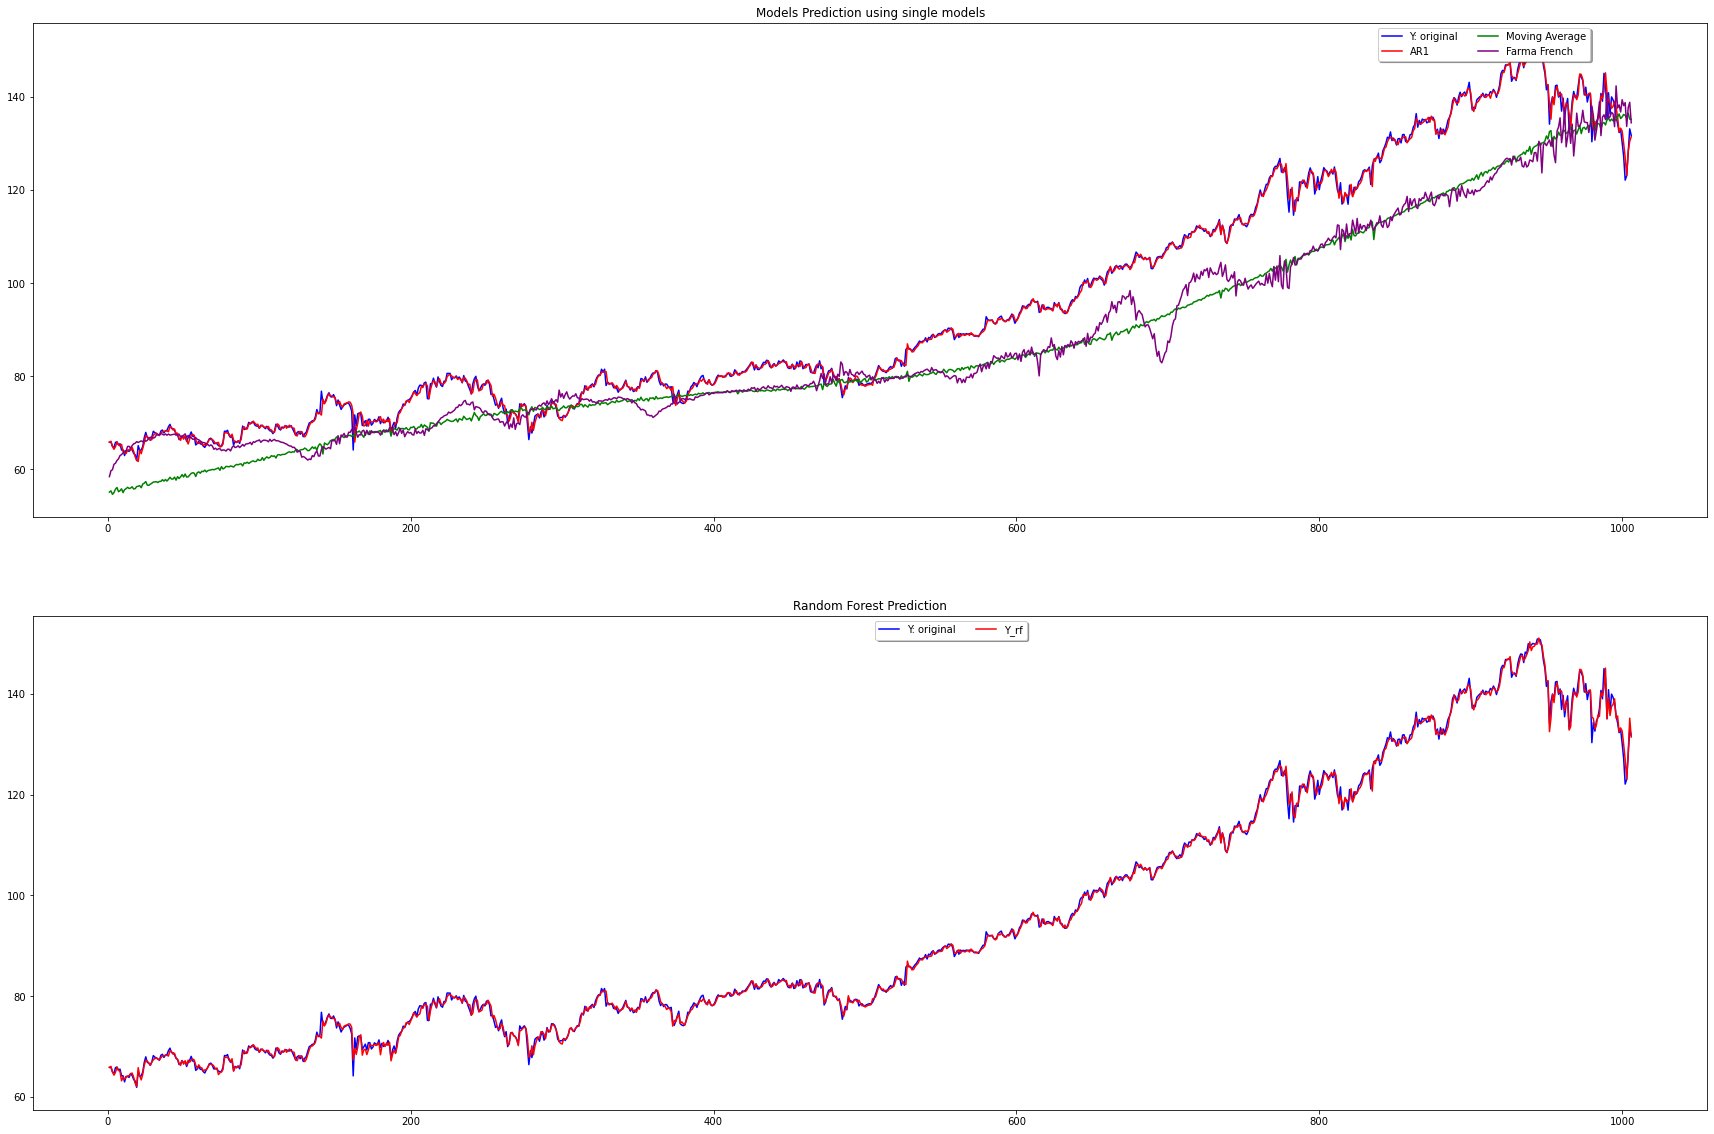

In [23]:
Y_rf,Y, Y_close = Randomforest()

In [24]:
results = np.stack([Y,Y_rf,Y_close],axis=1)

In [25]:
final_results = pd.DataFrame(results,columns=['Y','Y_rf','Y_close'])
final_results.head()

,Y,Y_rf,Y_close
0,65.845001,65.836616,66.254997
1,65.872498,66.041445,64.792503
2,64.947502,64.961186,64.375000
3,64.610001,64.310064,65.237503
4,65.800003,64.857180,66.112503


In [26]:
final_results.head()

,Y,Y_rf,Y_close
0,65.845001,65.836616,66.254997
1,65.872498,66.041445,64.792503
2,64.947502,64.961186,64.375000
3,64.610001,64.310064,65.237503
4,65.800003,64.857180,66.112503


In [27]:
final_results = final_results.reindex()

In [28]:
final_results

,Y,Y_rf,Y_close
0,65.845001,65.836616,66.254997
1,65.872498,66.041445,64.792503
2,64.947502,64.961186,64.375000
3,64.610001,64.310064,65.237503
4,65.800003,64.857180,66.112503
...,...,...,...
1001,122.080002,126.955543,121.730003
1002,123.019997,123.038437,130.229996
1003,127.989998,128.240784,132.009995
1004,133.080002,135.164259,130.940002
